In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
trade = pd.read_csv("cashewprep.csv")
trade['Quantity'] = trade['Quantity']/1000 

The Data: The initial dataset was downloaded from kaggle.com. It contains international trade statistics for the HS code 080310, also known as cashew nuts. The file contains the country or area, year, comm. code, flow, trade value in USD, and quantity in kg. Above, the initially quantity is divided by 1000 to convert the values to metric tons or 'MT'.

Cashew nuts come in two forms. The can be in the shell, which is referred to as raw cashew nut, or 'RCN'. The other form is without the shell, or cashew kernel. Both forms are reported under the same code, even though cashew kernels are about 22-25% the weight of a nut in the shell. (It takes 4.5 kg of RCN to make 1 kg of kernel) After some general research on the flow of raw cashew and cashew kernels, https://bencoleman.me/portfolio/aca-world-map, it turns out that this indistinction poses a challenge to producing meaningful insight. For example, Benin and Viet Nam would show up on the same export graph, even though they export different forms of cashew. To control for these types of distortions, the information obtained is assumed to be accurate and the dataset is reduced to RCN exporters, RCN importers, and kernel exporters.


In [40]:
print(trade['Country or Area'].unique())

['Benin' 'Brazil' 'Burkina Faso' 'Cambodia' "Côte d'Ivoire" 'Gambia'
 'Ghana' 'Guinea' 'India' 'Indonesia' 'Mozambique' 'Nigeria' 'Togo'
 'United Rep. of Tanzania' 'Viet Nam']


Question 1. Where does cashew come from? Who are the main players in the market?

First, separate the RCN exporters from the RCN importers, and exclude Brazil, India and Viet Nam (they export kernel not RCN). Then look at 2016  to get a general idea of the RCN trade. 

In [41]:
exports = trade.loc[trade['Flow'] == 'Export'] 
exports = exports.loc[exports['Country or Area'] != 'India']
exports = exports.loc[exports['Country or Area'] != 'Viet Nam']
exports = exports.loc[exports['Country or Area'] != 'Brazil']

To generate a clean pie chart of the exports in 2016, sum the exports of countries who export less than 5% total and regroup as 'Other'.

In [42]:
pie1 = pd.DataFrame()
pie1['labels'] = exports.loc[exports['Year'] == 2016, 'Country or Area']
pie1['quantity'] = exports.loc[exports['Year'] == 2016, 'Quantity']
pie1['pctofw'] = pie1.quantity/sum(pie1.quantity)
pie2 = pie1.loc[pie1['pctofw'] >= .05]
pie3 = pie1.loc[pie1['pctofw'] <= .05]
pie2.loc['6'] = ['Other', sum(pie3['quantity']), sum(pie3['pctofw'])]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


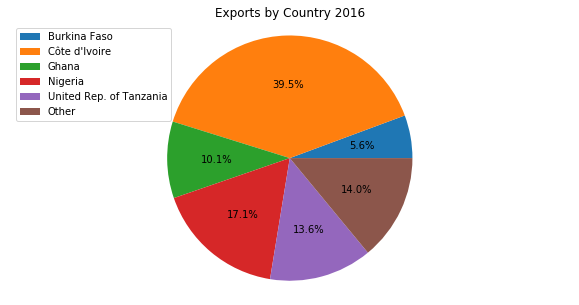

In [43]:
#Generate the Exporters Pie Chart
plt.figure(figsize=(10, 5))
plt.pie(pie2.quantity, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Exports by Country 2016')
plt.legend(pie2['labels'])

plt.show()

From the information in this pie chart, it is clear that Cote D'Ivoire is the world's largest exporter of RCN with a 40% share of world exports. Using this information, plus the research from before, it can be deduced that Cote D'Ivoire makes up almost 20% of world cashew production. Also noteworthy, the top five exporters of RCN make up over 85% of total exports and are all on the African continent. Next, look at the same pie chart for the importers of RCN.

In [44]:
imports = trade.loc[trade['Flow'] == 'Import']

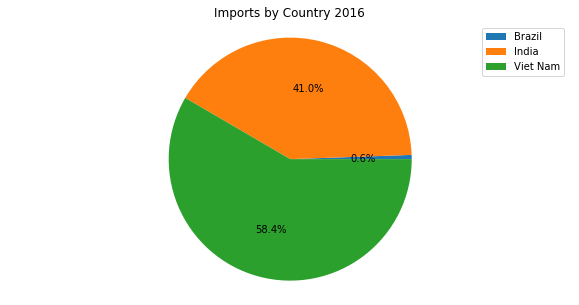

In [45]:
#Generate the Importers pie chart
plt.figure(figsize=(10, 5))
plt.pie(imports.loc[imports['Year'] == 2016, 'Quantity'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Imports by Country 2016')
plt.legend(imports.loc[imports['Year'] == 2016, 'Country or Area'])
plt.show()

There are only two significant markets for RCN. Viet Nam is the top exporter with 58.4% of total imports.

Question 2. Has it always been this way? What are some of the trends in recent history?

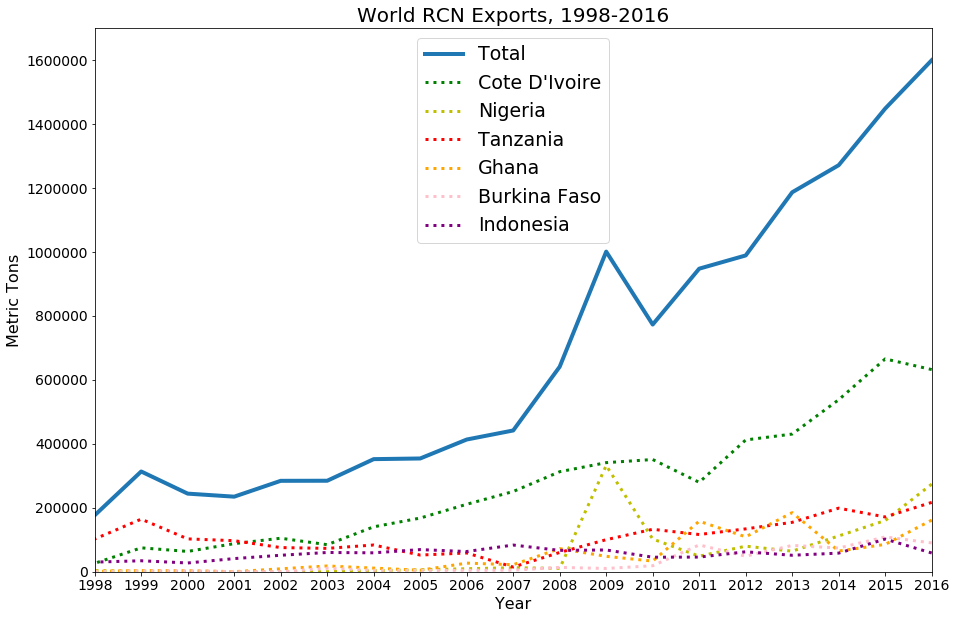

In [46]:
#Start by isolating each exporter
ivc = exports.loc[exports['Country or Area'] == "Côte d'Ivoire"]
ngr = exports.loc[exports['Country or Area'] == 'Nigeria']
tzn = exports.loc[exports['Country or Area'] == 'United Rep. of Tanzania']
gha = exports.loc[exports['Country or Area'] == 'Ghana']
bkf = exports.loc[exports['Country or Area'] == 'Burkina Faso']
indo = exports.loc[exports['Country or Area'] == 'Indonesia']
# Total Exports
exp_by_year = exports.groupby(exports['Year'])['Quantity'].sum()
#Plot the countries
plt.figure(figsize=(15,10))
plt.plot(exp_by_year, label='Total', linewidth=4)
plt.plot(ivc['Year'], ivc['Quantity'], label="Cote D'Ivoire", color='g', linestyle='dotted', linewidth=3)
plt.plot(ngr['Year'], ngr['Quantity'], label='Nigeria', color='y', linestyle='dotted', linewidth=3)
plt.plot(tzn['Year'], tzn['Quantity'], label='Tanzania', color='r', linestyle='dotted', linewidth=3)
plt.plot(gha['Year'], gha['Quantity'], label='Ghana', color='orange', linestyle='dotted', linewidth=3)
plt.plot(bkf['Year'], bkf['Quantity'], label='Burkina Faso', color='pink', linestyle='dotted', linewidth=3)
plt.plot(indo['Year'], indo['Quantity'], label='Indonesia', color='purple', linestyle='dotted', linewidth=3)
#Options
plt.legend(loc=9, fontsize=19)
plt.xlabel('Year', fontsize=16)
plt.xticks(range(1998, 2017, 1),fontsize=14)
plt.yticks(range(0, 1700000, 200000), fontsize=14)
plt.ylabel('Metric Tons', fontsize=16)
plt.ylim(0,1700000)
plt.xlim(1998,2016)
plt.title('World RCN Exports, 1998-2016', fontsize=20)

plt.show()


This graph shows world RCN exports. There is a clear uptrend in cashew production. Before 2001, Tanzania was the top exporter at less than 200,000 MT/year. After 2001, Cote D’Ivoire’s production increasingly dwarfed the rest of the African continent, reaching total exports of 635,000 MT in 2015.

Perhaps there is a ‘bumper’ crop every 10 years or so. (1998-1999 and 2008-2009).

Do the same for RCN importers.


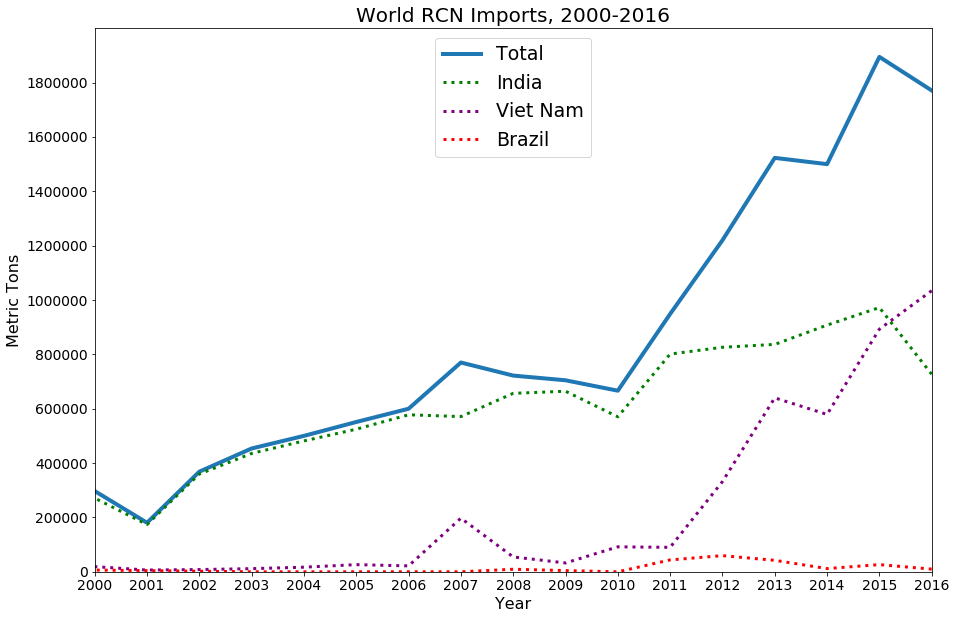

In [47]:
#Isolate country data
ind = imports.loc[imports['Country or Area'] == 'India'] #India
viet = imports.loc[imports['Country or Area'] == 'Viet Nam']#Viet Nam
brz = imports.loc[imports['Country or Area'] == 'Brazil']
imp_by_year = imports.groupby(imports['Year'])['Quantity'].sum()
#Plot importers
plt.figure(figsize=(15,10))
plt.plot(imp_by_year, label='Total', linewidth=4)
plt.plot(ind['Year'], ind['Quantity'], label='India', color='green', linestyle='dotted', linewidth=3)
plt.plot(viet['Year'], viet['Quantity'], label='Viet Nam', color='purple', linestyle='dotted', linewidth=3)
plt.plot(brz['Year'], brz['Quantity'], label='Brazil', color='red', linestyle='dotted', linewidth=3)
plt.legend(loc=9, fontsize=19)
plt.xlabel('Year', fontsize=16)
plt.xticks(range(1997, 2017, 1),fontsize=14)
plt.yticks(range(0, 2000000, 200000), fontsize=14)
plt.ylabel('Metric Tons', fontsize=16)
plt.ylim(0,2000000)
plt.xlim(2000,2016)
plt.title('World RCN Imports, 2000-2016', fontsize=20)

plt.show()

This graph tells a drastically different story than the snap shot of 2016. It looks like until the end of 2005, India imported almost all the RCN. But the following year Viet Nam comes online, effectively reversing the trend direction of India’s imports. In the following decade Viet Nam would become the primary driver of world imports, eventually displacing India as the top importer.


This is a lot of RCN moving across the globe. What happens to it? What does these countries do with all the RCN? Plot kernel exports.



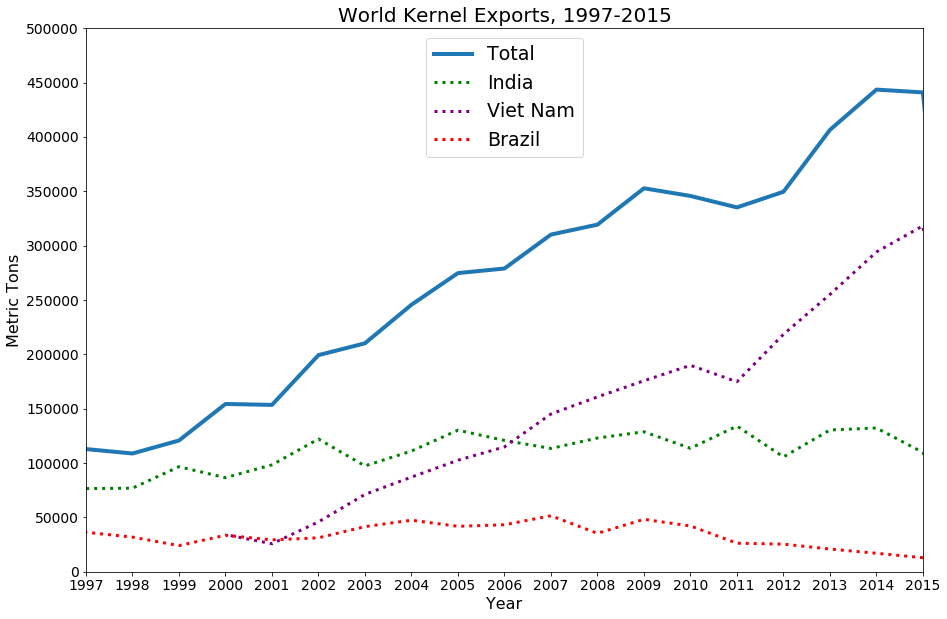

In [48]:
kexports = trade.loc[trade['Flow'] == 'Export'] 
indk = kexports.loc[kexports['Country or Area'] == 'India'] 
vietk = kexports.loc[kexports['Country or Area'] == 'Viet Nam']
brzk = kexports.loc[kexports['Country or Area'] == 'Brazil']
kexporters = pd.concat([brzk, indk, vietk])
k_by_year = kexporters.groupby(kexporters['Year'])['Quantity'].sum()
#Generate the plot
plt.figure(figsize=(15,10))
plt.plot(k_by_year, label='Total', linewidth=4)
plt.plot(indk['Year'], indk['Quantity'], label='India', color='green', linestyle='dotted', linewidth=3)
plt.plot(vietk['Year'], vietk['Quantity'], label='Viet Nam', color='purple', linestyle='dotted', linewidth=3)
plt.plot(brzk['Year'], brzk['Quantity'], label='Brazil', color='red', linestyle='dotted', linewidth=3)
plt.legend(loc=9, fontsize=19)
plt.xlabel('Year', fontsize=16)
plt.xticks(range(1997, 2017, 1),fontsize=14)
plt.yticks(range(0, 2000000, 50000), fontsize=14)
plt.ylabel('Metric Tons', fontsize=16)
plt.ylim(0,500000)
plt.xlim(1997,2015)
plt.title('World Kernel Exports, 1997-2015', fontsize=20)

plt.show()

This graph also shows an interesting story. While India’s RCN imports continued to climb in this period, her kernel exports remained relatively flat for the same period. Also remark, 2006 is the year that Viet Nam not only became aggressive in RCN imports, but also displaced India as the top kernel exporter. One takeaway is that cashews would be much more expensive without the emergence of Cote D’Ivoire and Viet Nam


Question 3. Is it profitable to process cashew?

Using the ‘Trade (USD)’ and the ‘Quantity’ columns of the dataset, the price of 1 MT in USD can be derived. Isolating the prices of RCN imports and subtracting them from the price of kernel exports produces a value like ‘Gross Profit,’ or the marginal value captured by the processing country. Because cashew is cyclical, the price of kernel exports in year n, should be compared against the RCN imports of year n-1. For example, the price at which the RCN was purchased in 2014 is subtracted from price at which the kernel was sold in 2015. (You can’t process what you haven’t imported, you can't export what you haven't processed). This posed yet another challenge for the analysis.

In [49]:
years = list((range(2001,2016))) #For indexing purposes
years.reverse()

#India
kernel_price_ind = list(indk['Trade (USD)']/indk['Quantity'])
rcn_price_ind = list(ind['Trade (USD)']/ind['Quantity'])
#The export value in (USD) of year 'n' should be compared against import value in (USD) of year n-1.
kpi = kernel_price_ind[1:16]
rpi = rcn_price_ind[2:17]
#New DF for accurate value comparisons
indprices = pd.DataFrame()
indprices['Year'] = years
indprices['Import'] = rpi
indprices['Export'] = kpi
indprices['Margin'] = indprices['Export'] - indprices['Import'] #Caluculate the value added or margin

#Viet Nam
kernel_price_viet = list(vietk['Trade (USD)']/vietk['Quantity'])
rcn_price_viet = list(viet['Trade (USD)']/viet['Quantity'])
kpv = kernel_price_viet[1:16]
rpv = rcn_price_viet[2:17]
vprices = pd.DataFrame()
vprices['Year'] = years
vprices['Import'] = rpv
vprices['Export'] = kpv
vprices['Margin'] = vprices['Export'] - vprices['Import']

#Brazil
kernel_price_brz = list(brzk['Trade (USD)']/brzk['Quantity'])
rcn_price_brz = list(brz['Trade (USD)']/brz['Quantity'])
kpb = kernel_price_brz[1:16]
rpb = rcn_price_brz[1:16]
bprices = pd.DataFrame()
bprices['Year'] = years
bprices['Import'] = rpb
bprices['Export'] = kpb
bprices['Margin'] = bprices['Export'] - bprices['Import']

At this point each country shows a margin it gained (Exports - Imports). But the data from Brazil was showing inconsistent import prices, sometimes resulting in a negative margin. To adjust for this, an average price of RCN export prices was used instead of the countries respective imports price.

In [57]:
ivc['Price'] = ivc['Trade (USD)']/ivc['Quantity']
tzn['Price'] = tzn['Trade (USD)']/tzn['Quantity']
indo['Price'] = indo['Trade (USD)']/indo['Quantity']
mkt_exp_price = pd.concat([ivc, tzn, indo])#DF with selected countries

mkt_exp_price[['Price']].groupby(mkt_exp_price['Country or Area']).describe()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

Price                                       \
                        count         mean         std         min   
Country or Area                                                      
Côte d'Ivoire            20.0   723.627777  307.281592  415.576349   
Indonesia                20.0  1214.510759  395.722902  645.560364   
United Rep. of Tanzania  20.0  1049.093636  395.758060  566.639513   

                                                                            
                                25%          50%          75%          max  
Country or Area                                                             
Côte d'Ivoire            484.392529   635.525001   851.043702  1520.371049  
Indonesia                958.135687  1158.096864  1603.787440  1773.750111  
United Rep. of Tanzania  821.779532   919.877176  1205.488938  1968.757708

From this information, we can speculate that some origins receive a premium over others. For an average export price to be accurate, it must be a weighted average.

In [60]:
#DF to calculate weight average price per year
avg_prices = pd.DataFrame()
avg_prices['Year'] = ivc['Year']
avg_prices['IVC'] = ivc['Trade (USD)'] #we just use trade because it == Price*Quantity
avg_prices['TZN'] = list(tzn['Trade (USD)'])#these return NaN in the DF if not converted
avg_prices['INDO'] = list(indo['Trade (USD)'])
avg_prices['IVCQ'] = ivc['Quantity']
avg_prices['TZNQ'] = list(tzn['Quantity'])
avg_prices['INDOQ'] = list(indo['Quantity'])
avg_prices['Agg_Val'] = avg_prices['IVC']+avg_prices['TZN']+avg_prices['INDO'] #SUM*PRODUCT
avg_prices['Agg_Quant'] = avg_prices['IVCQ']+avg_prices['TZNQ']+avg_prices['INDOQ'] #sum(quantity)
avg_prices['Avg_Price'] = avg_prices['Agg_Val']/avg_prices['Agg_Quant'] #SUM*PRODUCT/SUM(QUANTITY)
mkt_price = list(avg_prices['Avg_Price']) #convert to list to index in DF
adj_mkt_price = mkt_price[1:16] #adjust len() to conform to prior data
#construct the margin data frame with updated market prices instead of import prices
indprices['Import']= adj_mkt_price
vprices['Import']= adj_mkt_price
bprices['Import']= adj_mkt_price
indprices['Margin'] = indprices['Export'] - indprices['Import']
vprices['Margin'] = vprices['Export'] - vprices['Import']
bprices['Margin'] = bprices['Export'] - bprices['Import']

#Average kernel export prices (line)
avg_rev = pd.DataFrame()
avg_rev['Year'] = indprices['Year']
avg_rev['IND'] = indprices['Export']
avg_rev['BRZ'] = bprices['Export']
avg_rev['VIET'] = vprices['Export']
avg_rev['NRM AVG'] = (avg_rev['IND']+avg_rev['BRZ']+avg_rev['VIET'])/3
nrm_avg_exp = list(avg_rev['NRM AVG'])
# Kernel export price - avg market 
avg_mar = pd.DataFrame()
avg_mar['Year'] = indprices['Year']
avg_mar['IND'] = indprices['Margin']
avg_mar['BRZ'] = bprices['Margin']
avg_mar['VIET'] = vprices['Margin']
avg_mar['NRM AVG'] = (avg_mar['IND']+avg_mar['BRZ']+avg_mar['VIET'])/3
nrm_avg_mar = list(avg_mar['NRM AVG'])



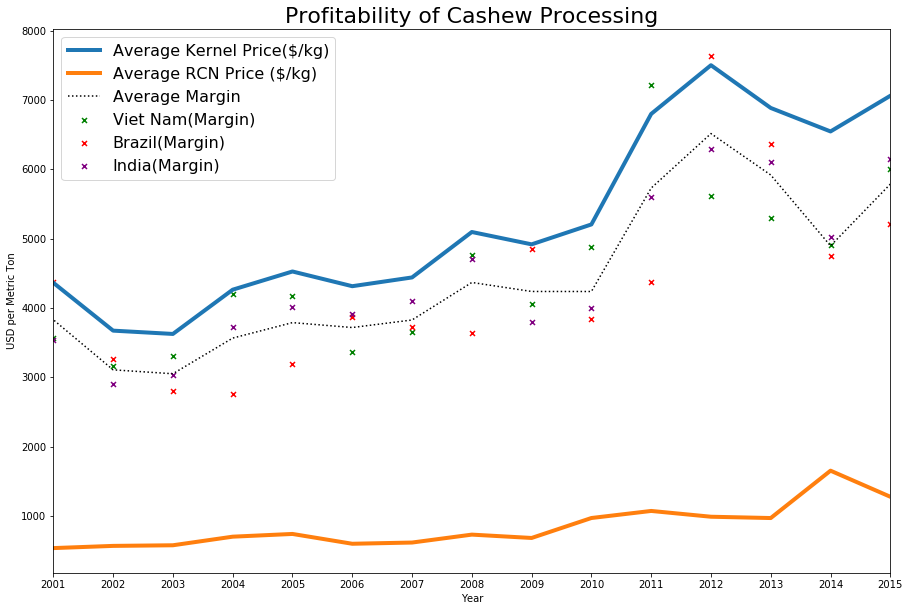

In [61]:
#Plot average RCN price, average kernel price and gross profit by country
plt.figure(figsize=(15,10))
plt.plot(years, nrm_avg_exp, label='Average Kernel Price($/kg)', linewidth=4)
plt.plot(years, adj_mkt_price, label='Average RCN Price ($/kg)', linewidth=4)
plt.plot(years, nrm_avg_mar, label='Average Margin', color='black', linestyle='dotted')
plt.scatter(
    x=vprices['Year'],
    y=vprices['Margin'],
    color='green', marker='x',
    s=25, label='Viet Nam(Margin)')
plt.scatter(
    x=bprices['Year'],
    y=bprices['Margin'],
    color='red', marker='x',
    s=25, label='Brazil(Margin)'
    )
plt.scatter(
    x=indprices['Year'],
    y=indprices['Margin'],
    color='purple', marker='x',
    s=25, label='India(Margin)')
plt.xlim(2001,2015)
plt.xticks(range(2001,2016, 1))
plt.xlabel('Year')
plt.ylabel('USD per Metric Ton')
plt.title("Profitability of Cashew Processing", fontsize=22)
plt.legend(loc='upper left', fontsize=16)

plt.show()

The solid lines of the graph show the average export price of kernels by year, and the average price of RCN by year. The space in between the lines would represent the gross profit, or margin. This margin is represented by the dotted line. The 'x's represent each countries margin or 'profitability' per year.

-Everyone knows that cashews are expensive. But why are they so expensive? 

-How do world events such as the weather or political changes or globalization affect the price of cashew? 

An evaluation of the global cashew nut value chain could answer these questions. The data science toolbox would be used to collect and analyze relevant news, weather predictions, cargo rates etc. This data could used to analyze how events in one section of the supply chain (raw cashew nuts) affect other sections of the supply chain (kernel) ultimately affecting the price of cashew kernel in general.
